In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import  load_boston # dataset
from sklearn.model_selection import train_test_split # for training test data
from sklearn.linear_model import LinearRegression #LR implement
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.model_selection import cross_val_score# cross validation
from sklearn.metrics import r2_score # checking r requare
import seaborn as sns

In [ ]:
df=load_boston()
pdf=pd.DataFrame(df.data,columns=df.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
pdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
#train test split
x=pdf
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)  

In [ ]:
# standadzing the dataset : its a important step
scaler=StandardScaler() #initialize

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
# never do standardizing for target variable
# if want to reverse the transform then: scaler.inverse_transform(train)

In [ ]:
  # we have multiple input variable or we can say multiple independet featurs
  # so it is multiple linear regrassion
  regression=LinearRegression()
  regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
# cross validation: divide in multiple group and validate after combining all o/p 
#and check the mean of that

msqq=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=5 )

np.mean(msqq) # lower is better

-23.65441827030464

In [ ]:
# prediction
reg_prd=regression.predict(x_test)

In [ ]:
reg_prd

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


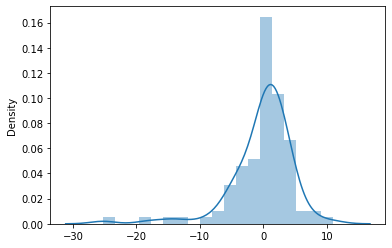

In [ ]:
# check if prediction is correct or not , so need to compare this prediction with our actual target value
sns.distplot(reg_prd-y_test, kde=True)

Infrence: the differnece is less the variance is -10 to 10 mostly, so the dataset is good

In [ ]:
# checking r requare
score=r2_score(reg_prd,y_test)
score

0.6333247469014345

Infrence : the error rate is very low so the model is good.